In [1]:
import numpy as np
import numpy.typing as npt
import cv2
import matplotlib.pyplot as plt
import torch
import os

In [2]:
dataDir = "./DATA/Micro_Organism"

In [3]:
img1CV = cv2.imread(os.path.join(dataDir, "Rod_bacteria/Image_63.jpg"))
img1 = cv2.cvtColor(img1CV, cv2.COLOR_BGR2RGB)

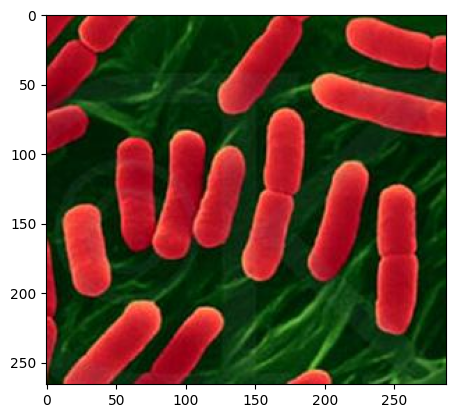

In [4]:
plt.imshow(img1)

In [76]:
def apply2DConvolutionOnChannel(imgChannel: npt.NDArray, kernel: npt.NDArray, stride: int = 1, padding: int = 0):

    # assuming padding is 0 and string is 1

    h, w = imgChannel.shape
    kh, kw = kernel.shape
    assert kh % 2 != 0 
    assert kw %2 != 0
    output = np.zeros((h, w), dtype=np.int16)
    offsetY = kh // 2
    offsetX = kw // 2
    for y in range(offsetY, h-offsetY):
        for x in range(offsetX, w-offsetX):
            imgArea = imgChannel[y-offsetY : y+offsetY+1, x-offsetX : x+offsetX+1]
            pixelVal = np.sum(kernel * imgArea)
            output[y, x] = int(pixelVal)
            # return output

    return output

def apply2DConvolution(img: npt.NDArray, kernel: npt.NDArray, stride: int = 1, padding: int = 0):
    if img.shape[-1] == 3:
        r = img1[:, :, 0]
        g = img1[:, :, 1]
        b = img1[:, :, 2]
        return np.stack([
            apply2DConvolutionOnChannel(r, kernel),
            apply2DConvolutionOnChannel(g, kernel),
            apply2DConvolutionOnChannel(b, kernel),
        ], axis=-1)
    

def juxtapose(img1: npt.NDArray, img2: npt.NDArray):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    plt.show()
            

In [74]:
## Kernels
blurKernel = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625],
])
assert np.sum(blurKernel) == 1.0

horKernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1],
])
assert np.sum(horKernel) == 0

vertKernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])
assert np.sum(vertKernel) == 0


outline = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])
        
assert np.sum(outline) == 0

outline2 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 24, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
])
        
assert np.sum(outline2) == 0

In [59]:
# rChannel = img1[:, :, 0]

# outputR = apply2DConvolutionOnChannel(rChannel, blurKernel)
# plt.imshow(outputR)

In [60]:
output = apply2DConvolution(img1, blurKernel)
# print(output.shape)
juxtapose(img1, output)

(266, 288, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


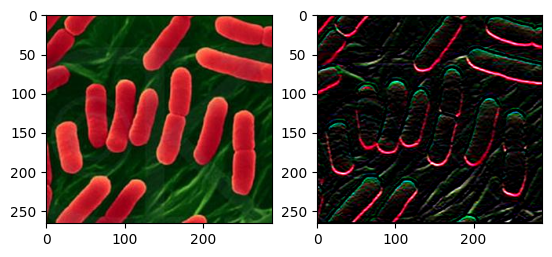

In [69]:
output = apply2DConvolution(img1, horKernel)
# print(output.shape)
juxtapose(img1, output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


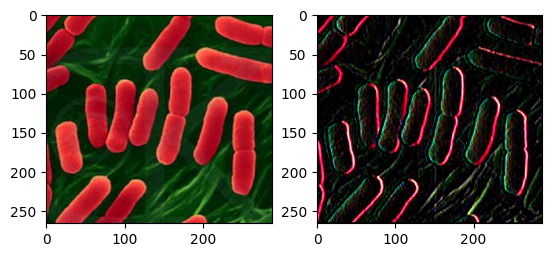

In [71]:
output = apply2DConvolution(img1, vertKernel)
# print(output.shape)
juxtapose(img1, output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


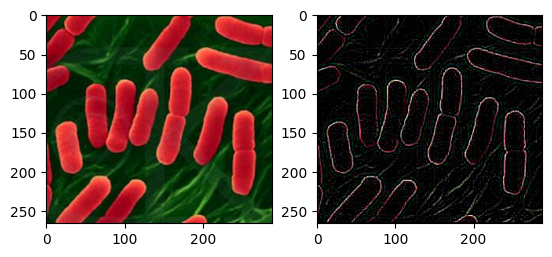

In [73]:
output = apply2DConvolution(img1, outline)
# print(output.shape)
juxtapose(img1, output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


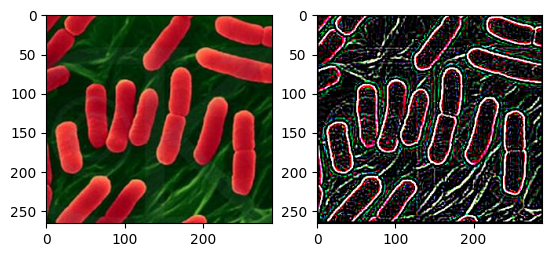

In [77]:
output = apply2DConvolution(img1, outline2)
# print(output.shape)
juxtapose(img1, output)

In [62]:

# plt.imshow(output)
# plt.show()
# plt.imshow(output[:, :, 0], cmap='gray')
# plt.show()
# plt.imshow(output[:, :, 1], cmap='gray')
# plt.show()
# plt.imshow(output[:, :, 2], cmap='gray')